In [2]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import os
import openai
import re

In [4]:
today = date.today()


In [5]:
password = pd.read_csv("passwords.csv")
password_nps = password["password"][0]


In [13]:
path = "./Reference data/Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [7]:
data

'{"road_event_feed_info":{"publisher":"National Park Service","version":"4.1","update_date":"2024-01-16T16:49:30.901071Z","update_frequency":60,"contact_name":"National Park Service","contact_email":"asknps@nps.gov","data_sources":[{"data_source_id":"02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2","organization_name":"Crater Lake National Park","update_date":"2024-02-01T01:07:37.430224Z","contact_name":"Crater Lake National Park","contact_email":"CRLA_Superintendent@nps.gov"},{"data_source_id":"16e33ae7-e71f-45ce-2e37-08d4c7ad36e2","organization_name":"Yosemite National Park","update_date":"2023-07-09T18:07:22.389219Z","contact_name":"Yosemite National Park","contact_email":"YOSE_Superintendent@nps.gov"},{"data_source_id":"44ada19c-0e53-4e96-2dd7-08d4c7ad36e2","organization_name":"Sequoia & Kings Canyon National Parks","update_date":"2023-07-11T05:13:31.289306Z","contact_name":"Sequoia & Kings Canyon National Parks","contact_email":"SEKI_Superintendent@nps.gov"},{"data_source_id":"5678c152-a38a-

In [6]:
#pull API using API key
road_events_url = "https://developer.nps.gov/api/v1/roadevents?api_key=" + password_nps

response_API = requests.get(road_events_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [7]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [24]:
park_df

,park,number of alerts
6,Ozark National Scenic Riverways,2
4,Buffalo National River,2
8,Guadalupe Mountains National Park,2
7,Dinosaur National Monument,4
13,Big Thicket,4
9,Great Smoky Mountains National Park,6
5,Grand Canyon National Park,6
11,Natchez Trace Parkway,8
10,Delaware Water Gap,10
12,Chickamauga & Chattanooga,10


In [8]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [14]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(14, 126, 26)

In [15]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
    try:
        print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    except:
        pass
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Description:  Seasonal closure of North Entrance Road and Rim Drive due to snow from October through June. 
Event type:  incident
Road name:  ['North Entrance Road', 'West Rim Drive', 'East Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
Dates:  2025-10-10T07:00:00Z to  2026-07-01T06:59:59Z

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Description:  Seasonal closure of North Entrance Road and Rim Drive due to snow from October through June. 
Event type:  incident
Road name:  ['North Entrance Road', 'West Rim Drive', 'East Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
Dates:  2025-10-10T07:00:00Z to  2026-07-01T06:59:59Z

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Descrip

In [16]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id
0,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
1,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
2,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
3,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
4,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2


In [17]:
parks.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
parks = parks[['park', 'region', 'alpha', "State"]]
parks.head()

,park,region,alpha,State
0,Alagnak Wild River,AKR,ALAG,AK
1,Aniakchak National Monument and Preserve,AKR,ANIA,AK
2,Bering Land Bridge National Preserve,AKR,BELA,AK
3,Cape Krusenstern National Monument,AKR,CAKR,AK
4,Denali National Park and Preserve,AKR,DENA,AK


In [18]:
merged_df = pd.merge(df_update, parks, on="park", how="inner")
merged_df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
1,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
2,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
3,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
4,2025-10-24,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR


In [19]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [20]:
df_update = pd.concat([merged_df, df_old_update])


In [21]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

np.int64(0)

In [17]:
len(df_update)

4175

In [22]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)

In [19]:
len(df_update.park.unique())

36

In [20]:
df_update.shape

(4175, 12)

In [22]:
df_update['date'] = pd.to_datetime(df_update['date'], format = 'mixed')

In [23]:
df_update['date'].value_counts()

date
2024-07-03    366
2024-04-19    364
2025-01-23    276
2025-02-28    256
2024-08-28    180
2024-04-29    172
2024-06-28    138
2024-04-26    120
2024-11-25    112
2025-09-19    112
2024-11-13    102
2025-04-16     98
2024-05-22     91
2025-05-14     89
2024-03-04     83
2024-10-09     78
2025-06-16     73
2025-08-18     73
2024-07-16     71
2024-07-10     71
2024-06-17     71
2024-10-31     70
2025-07-17     69
2024-07-23     65
2024-07-24     63
2024-07-02     63
2024-04-02     62
2024-02-05     61
2024-07-30     60
2024-07-31     60
2024-06-06     58
2024-09-10     56
2024-05-08     56
2024-08-22     56
2024-08-16     56
2024-08-07     54
2024-08-14     54
2024-09-17     54
2024-08-13     54
2024-05-02     52
2023-10-17     11
2023-10-23     11
2024-02-01      8
2024-01-11      5
2023-11-27      4
2023-12-18      4
2024-01-18      4
2023-12-28      3
2024-01-04      3
2024-01-25      3
Name: count, dtype: int64

In [23]:
running_park_list = []
date_list = []
park_count_list = []

df_update = df_update.sort_values(by=['date'])

for x in df_update.date.unique():
    df_date = df_update.loc[df_update['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

1/11/2024 :  5
Shenandoah National Park
Natchez Trace Parkway
Mojave National Preserve
Fort Point National Historic Site
1/18/2024 :  4
1/25/2024 :  3
1/4/2024 :  3
Padre Island National Seashore
10/17/2023 :  11
Olympic National Park
Yosemite National Park
Dinosaur National Monument
Acadia National Park
Golden Gate National Recreation Area
10/23/2023 :  11
11/27/2023 :  4
12/18/2023 :  4
Muir Woods National Monument
12/28/2023 :  3
2/1/2024 :  8
2/5/2024 :  61
Redwood National Park
Death Valley National Park
Valley Forge National Historical Park
Point Reyes National Seashore
Zion National Park
Crater Lake National Park
Guadalupe Mountains National Park
Organ Pipe Cactus National Monument
Bryce Canyon National Park
2024-08-28 :  180
De Soto National Memorial
Black Canyon of the Gunnison National Park
Great Smoky Mountains National Park
Curecanti National Recreation Area
Capitol Reef National Park
Blue Ridge Parkway
Ozark National Scenic Riverways
Buffalo National River
Sleeping Bear Du

In [25]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])


In [26]:
# Ensure 'date' is in datetime format and reads all the various formats from the combined_status_tracker
df_count['date'] = pd.to_datetime(df_count['date'],format='mixed')

# Filter for the latest date in each month
df_count['year_month'] = df_count['date'].dt.to_period('M')
latest_dates = df_count.groupby('year_month')['date'].max().reset_index()
df_count_latest = pd.merge(df_count, latest_dates[['date']], on='date')
df_count_latest.dropna(subset=['count of parks'], inplace=True)
df_count_latest.drop_duplicates(subset=['date','count of parks'], inplace=True)
df_count_latest = df_count_latest.reset_index()

df_count_latest['months'] = df_count_latest.date.dt.strftime("%b %Y")
df_count_latest

,index,date,count of parks,year_month,months
0,0,2023-10-23,7,2023-10,Oct 2023
1,1,2023-11-27,8,2023-11,Nov 2023
2,2,2023-12-28,10,2023-12,Dec 2023
3,3,2024-01-25,11,2024-01,Jan 2024
4,4,2024-02-05,20,2024-02,Feb 2024
5,5,2024-03-04,23,2024-03,Mar 2024
6,6,2024-04-29,26,2024-04,Apr 2024
7,7,2024-05-22,30,2024-05,May 2024
8,8,2024-06-28,31,2024-06,Jun 2024
9,9,2024-07-31,31,2024-07,Jul 2024


[]

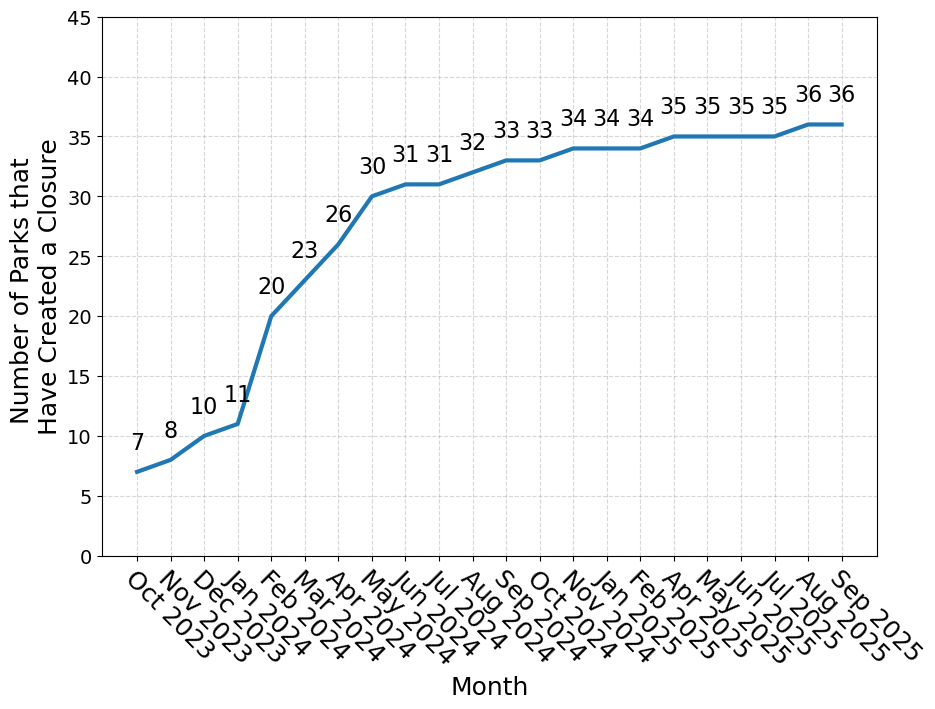

In [27]:
# Adjusting the figure size
fig = plt.subplots(figsize=(10, 7))

# Creating a plot
plt.plot(df_count_latest['months'], df_count_latest['count of parks'], linewidth=3)

for i, j in zip(df_count_latest['months'], df_count_latest['count of parks']):
    plt.text(i, j+1.5, f'{j}', ha='center', va='bottom', fontsize = 16)


# Adding a plot title and customizing its font size
#plt.title('Count of Parks that have use Road Closure & Incident App', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Parks that \nHave Created a Closure', fontsize=18)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=-45, fontsize=18, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.ylim([0,max(df_count_latest['count of parks'])*1.25])
plt.grid(True, linestyle='--', alpha=0.5) 


output_dir = 'Figures/Combined across Regions'
os.makedirs(output_dir, exist_ok=True)

# Save the figure as a PNG file at 150 DPI
filename_string = 'running_alerts_count_' + str(today) + '.png'

output_path = os.path.join(output_dir, filename_string)
plt.savefig(output_path, dpi=150, bbox_inches='tight')

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


In [28]:
df_count

,date,count of parks,year_month
0,2023-10-17,7,2023-10
1,2023-10-23,7,2023-10
2,2023-11-27,8,2023-11
3,2023-12-18,10,2023-12
4,2023-12-28,10,2023-12
5,2024-01-04,10,2024-01
6,2024-01-11,11,2024-01
7,2024-01-18,11,2024-01
8,2024-01-25,11,2024-01
9,2024-02-01,11,2024-02


## Alerts

In [24]:
#pull API using API key
alerts_url = "https://developer.nps.gov/api/v1/alerts?limit=1000&api_key=" + password_nps

response_API = requests.get(alerts_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

with open("C:/Users/Drew.Quinton/Documents/GitHub/NPS-Emerging-Mobility/ARTNAPI.txt", "r", encoding="utf-8") as f:
    openai_api_key = f.read()

client = openai.OpenAI(
    api_key = openai_api_key,
    base_url="http://10.75.42.137:4000/" 
    )

In [25]:
id_list = []
url_list = []
title_list = []
parkCode_list = []
description_list = []
category_list = []
relatedRoadEvents_list = []
lastIndexedDate_list = []

for x in df['data']:
    #print(x)
    id_list.append(x['id'])
    url_list.append(x['url']) 
    title_list.append(x['title']) 
    parkCode_list.append(x['parkCode'].upper()) 
    description_list.append(x['description'])
    category_list.append(x['category']) 
    relatedRoadEvents_list.append(x['relatedRoadEvents'])
    lastIndexedDate_list.append(x['lastIndexedDate'])


In [26]:
alerts_df = pd.DataFrame({
    'id': id_list, 
    'url': url_list, 
    'title': title_list,
    'park alpha': parkCode_list,
    'description': description_list,
    'category': category_list,
    'relatedRoadEvents':relatedRoadEvents_list,
    'LastIndexedDate':lastIndexedDate_list
})

In [27]:
alerts_df2 = alerts_df.merge(parks,left_on='park alpha', right_on="alpha", how = "left")

alerts_df2['Road Closed Flag'] = None

854

In [30]:
road_closed_flag_list = []

user_prompt = 'tell me if the following is a description of a road closure. If so, respond with "yes", if not, respond with "no" : '

total_alerts = len(alerts_df2)
alerts_processed = 0

for description in alerts_df2['description']:
    
    response = client.chat.completions.create(
        model = "GPT-4.1-mini", # model to send to the proxy. One of: GPT-4o-Mini, GPT-4o, o1-Mini, o4-Mini, GPT-4.1, GPT-4.1-mini, GPT-4.1-nano,
        # text-embedding-3-small, text-embedding-3-large, MAI-DS-R1, Llama-3.2-Vision, GPT-5, GPT-5-Mini, GPT-5-Nano , gpt-4o-transcribe
        messages = [
            {
                "role": "system",
                "content": 'You will be given a series of phrases. These phrases are general alerts to users visiting national parks. Your job is to identify, alerts that indicate that a road, lane, or parking lot is closed or reduced in capacity. Do not identify trails that are closed or reduced in capacity.'
            },
            {
                "role": "user",
                "content": user_prompt + description
            }
        ]
    )
    closure_response = response.choices[0].message.content
   
    formatted_closure_response = re.sub(r'[^A-Za-z0-9\s]', '', closure_response.lower())
    road_closed_flag_list.append(formatted_closure_response)
    
    percent_complete = round(((alerts_processed/total_alerts)*100), 1)
    print(formatted_closure_response + "    |   " + str(percent_complete) + "% complete")
    alerts_processed = alerts_processed +1

n = len(road_closed_flag_list)

alerts_df2.iloc[:n, alerts_df2.columns.get_loc("Road Closed Flag")] = road_closed_flag_list

yes    |   0.0% complete
no    |   0.1% complete
no    |   0.2% complete
yes    |   0.3% complete
no    |   0.5% complete
yes    |   0.6% complete
yes    |   0.7% complete
yes    |   0.8% complete
no    |   0.9% complete
no    |   1.0% complete
no    |   1.2% complete
no    |   1.3% complete
yes    |   1.4% complete
yes    |   1.5% complete
no    |   1.6% complete
yes    |   1.7% complete
no    |   1.9% complete
yes    |   2.0% complete
no    |   2.1% complete
yes    |   2.2% complete
no    |   2.3% complete
yes    |   2.4% complete
yes    |   2.6% complete
no    |   2.7% complete
no    |   2.8% complete
yes    |   2.9% complete
no    |   3.0% complete
no    |   3.1% complete
yes    |   3.3% complete
no    |   3.4% complete
yes    |   3.5% complete
yes    |   3.6% complete
no    |   3.7% complete
no    |   3.8% complete
no    |   4.0% complete
no    |   4.1% complete
yes    |   4.2% complete
no    |   4.3% complete
yes    |   4.4% complete
no    |   4.5% complete
no    |   4.7% complet

In [31]:
# add to alerts tracker table
alerts_df2['date'] = today_string
alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")
alerts_df2_combined = pd.concat([alerts_df2, alerts_df2_old])
alerts_df2_combined.to_csv("alerts_api_tracker.csv", index=False)

C:\Users\Drew.Quinton\AppData\Local\Temp\ipykernel_100604\2453644686.py:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")


In [32]:
alerts_df2.head()

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag,date
0,B9E255C3-0613-462C-92D9-6815F8AD4C1F,https://forecast.weather.gov/MapClick.php?lon=...,Road from Park Headquarters to Rim Village to ...,CRLA,The road from Park Headquarters to Rim Village...,Park Closure,[],2025-10-24 00:00:00.0,Crater Lake National Park,PWR,CRLA,OR,yes,2025-10-24
1,2F474CF8-9FEA-4DEB-9D6C-87B812F90FAF,,Road Maintenance on Pozo Nuevo Road,ORPI,"Beginning October 30th, maintenance crews will...",Caution,[],2025-10-24 00:00:00.0,Organ Pipe Cactus National Monument,IMR,ORPI,AZ,no,2025-10-24
2,C9A8E392-5F20-49E9-B505-EA290484D2F2,https://www.nps.gov/moru/planyourvisit/upload/...,"October 22nd, 2025- October 28th, 2025 Safety ...",MORU,"On October 22nd, 2025 through October 28th, 20...",Park Closure,[],2025-10-24 00:00:00.0,Mount Rushmore National Memorial,MWR,MORU,SD,no,2025-10-24
3,84A3E324-2998-450B-9E39-ED01C1730755,,Winter storm forecast: be prepared for road cl...,YOSE,Road closures (including Tioga Road and/or Gla...,Park Closure,[],2025-10-23 00:00:00.0,Yosemite National Park,PWR,YOSE,CA,yes,2025-10-24
4,BCA3D851-D6B5-4D79-B590-8C59B69C74C6,https://forecast.weather.gov/wwamap/wwatxtget....,Red Flag Warning for Fire Weather,HAVO,A Red Flag Warning for fire weather is in effe...,Danger,[],2025-10-23 00:00:00.0,Hawai'i Volcanoes National Park,PWR,HAVO,HI,no,2025-10-24


##### Create a tracking table

NPS wants to know how many total road closures there are, and how many of these are included in the TDx feed. For this, we can subset our alerts table for road closure alerts then compare our 2 tables. 

In [37]:
# new entry with: date | total number of alerts | total number of closure | total parks with closures | 
# total number of 'related road events' | total parks with 'related road events' | % closures with 'related road event' | % of parks with 'related road events'

old_alerts_closure_tracker = pd.read_csv("./Alerts_Closure_Tracker.csv", encoding="utf-8-sig")

row = {}


row['Date'] = today_string
row['Total Number of Alerts'] = len(alerts_df2)
row['Unique parks with alerts']= len(alerts_df2['park alpha'].unique())
row['Total Identified Closures'] = num_closures = len(alerts_df2[alerts_df2['Road Closed Flag'] =='yes'])

row['Unique Parks with Closures'] = unique_parks_closures = alerts_df2.loc[alerts_df2['Road Closed Flag'] == 'yes', 'park alpha'].nunique()
row['Closures in the Closure feed'] = total_closures_in_feed = (
    alerts_df2['relatedRoadEvents'].notna() &
    (alerts_df2['relatedRoadEvents'].astype(str).str.strip() != '[]')
    ).sum()

row['Unique Parks using closure feed'] = unique_parks_with_closures_in_feed = alerts_df2.loc[(
    alerts_df2['relatedRoadEvents'].notna() &
    (alerts_df2['relatedRoadEvents'].astype(str).str.strip() != '[]')
    ), 'park alpha'].nunique()

row['percent identified closures in closure feed'] = percent_closures_in_feed = round(( total_closures_in_feed / num_closures) * 100, 1)
row['percent parks using feed'] = round((unique_parks_with_closures_in_feed / unique_parks_closures) * 100, 1)

new_alerts_closure_tracker = pd.DataFrame([row])

new_alerts_closure_tracker = new_alerts_closure_tracker.reindex(columns=old_alerts_closure_tracker.columns)

# print(total_alerts)
# print(unique_parks)
# print(num_closures)
# print(unique_parks_closures)
# print(total_closures_in_feed)
# print(unique_parks_with_closures_in_feed)
# print(percent_closures_in_feed)
# print(percent_parks_with_closures_in_feed)

new_alerts_closure_tracker = pd.concat([new_alerts_closure_tracker, old_alerts_closure_tracker])

# new_alerts_closure_tracker.to_csv("Alerts_Closure_Tracker.csv", index=False)

new_alerts_closure_tracker

,Date,Total Number of Alerts,Unique parks with alerts,Total Identified Closures,Unique Parks with Closures,Closures in the Closure feed,Unique Parks using closure feed,percent identified closures in closure feed,percent parks using feed
0,2025-10-24,858,356,115,89,22,13,19.1,14.6
0,2025-10-23,854,356,22,89,22,13,19.1,14.6


## Reach out to these parks regarding these alerts which should be in the closures feed:

In [ ]:
contact_parks_df = alerts_df2.head(0).copy()

mask = alerts_df2['Road Closed Flag'] == 'yes'
    
rows_to_add = alerts_df2.loc[mask, alerts_df2.columns].copy() 
contact_parks_df = pd.concat([contact_parks_df, rows_to_add], ignore_index=True)

# contact_parks_df

contact_parks_df.to_csv('Contact_Parks/' + today_string + '_Contact_these_parks.csv')

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag
0,71F660F3-4349-41BB-9E5A-45F519FFF4D9,,Norris Geyser Basin Closed,YELL,"Norris Geyser Basin, including all boardwalks,...",Park Closure,[],2025-10-22 00:00:00.0,Yellowstone National Park,IMR,YELL,"ID,MT,WY",yes
1,8B622055-8E8A-4C6B-BE90-8D5893C2F331,,White Sands National Park Open to the Public,WHSA,White Sands National Park is now open from 9:0...,Park Closure,[],2025-10-22 00:00:00.0,White Sands National Park,IMR,WHSA,NM,yes
2,1E8B414E-27B9-435C-9B7F-FAFD86B96E54,,Pierce Stocking Scenic Drive Temporarily Close...,SLBE,The 7.4-mile one-way loop is closed due to uns...,Park Closure,[],2025-10-21 00:00:00.0,Sleeping Bear Dunes National Lakeshore,MWR,SLBE,MI,yes
3,8A5D7467-9F35-4FB8-A035-AE9DA6039BA9,https://www.nps.gov/dino/learn/news/quarryexhi...,Quarry Exhibit Hall Temporary Closure,DINO,"The Quarry Exhibit Hall ""Wall of Bones"" is tem...",Park Closure,[],2025-10-21 00:00:00.0,Dinosaur National Monument,IMR,DINO,"CO,UT",yes
4,238A4176-5720-4AD2-A0BC-9BF3C469459B,,Baker Creek Prescribed Fire Area Closure,GRBA,"The Baker Creek area, including Baker Creek Ro...",Park Closure,[],2025-10-21 00:00:00.0,Great Basin National Park,PWR,GRBA,NV,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1ED85C21-EB71-4CBE-80A9-4A889494FA4E,,Temporary Blackland Prairie Trail Closure to E...,NATT,Heavy rain has undermined a culvert making it ...,Park Closure,[],2023-03-08 14:47:37.0,Natchez Trace National Scenic Trail,SER,NATT,"AL, MS, TN",yes
111,89E8F214-29EB-4BF5-B85E-01A4212E4F69,https://www.nps.gov/dena/planyourvisit/conditi...,Park Operations Altered Due to Pretty Rocks La...,DENA,Summer access to facilities and services in De...,Park Closure,[],2022-09-19 14:11:22.0,Denali National Park and Preserve,AKR,DENA,AK,yes
112,7EF3C4AE-4A5C-432A-83D3-D62231362FD1,https://www.nps.gov/articles/monsoon-season.htm,Monsoon Season & Flash Floods,CARE,"Heavy rains can cause sudden flooding, especia...",Caution,[],2022-07-12 15:11:21.0,Capitol Reef National Park,IMR,CARE,UT,yes
113,76963DF5-FF4B-4C00-8F86-2ECA0AED7446,https://www.nps.gov/pinn/planyourvisit/hours.htm,High Crowds & Park Capacity,PINN,High visitation may require limiting access to...,Information,[],2022-01-19 14:37:31.0,Pinnacles National Park,PWR,PINN,CA,yes


In [149]:
alerts_df2['relatedRoadEvents'].value_counts()

relatedRoadEvents
[]                                                                                                                                                                                                                                 832
[{'title': 'North Entrance Road and Rim Drive are CLOSED for the Season', 'id': '3AB12B2F-7C46-4EFF-BF4B-B431F4FB2C81', 'type': 'roadevent', 'url': 'https://www.nps.gov/crla/planyourvisit/conditions.htm'}]                        1
[{'title': 'Wawona Road Delays', 'id': '9444532C-FB52-42F2-956C-E475C5CF73FB', 'type': 'roadevent', 'url': 'https://www.nps.gov/yose/planyourvisit/conditions.htm'}]                                                                 1
[{'title': 'Sunrise Road closed for the winter. ', 'id': 'A652BAA3-2986-45C4-AB35-2B55746869DB', 'type': 'roadevent', 'url': 'https://www.nps.gov/mora/planyourvisit/conditions.htm'}]                                               1
[{'title': 'Park Headquarters Road closed', 'id': '83FCF16

In [108]:
# filter our alerts table to only include road closures
alerts_df3 = alerts_df2.loc[alerts_df2['Road Closed Flag']=="Yes"]

# group by our park-related fields and create sub-lists for our alert info
alerts_df3_grouped = alerts_df3.groupby(['park alpha', 'park',
        'State','region'])[['title', 'description', 'category',
       'relatedRoadEvents']].agg(lambda x: list(x)).reset_index()

In [109]:
# create list of the unique park alphas in our two tables
has_alerts = set(alerts_df3['park alpha'])
has_tdx = set(merged_df['alpha'])

# create sublists of overlapping alphas, only in alerts table, only in TDx table
has_both = has_alerts.intersection(has_tdx)
only_alerts = has_alerts - has_tdx
only_tdx = has_tdx - has_alerts

#create empty data frame then populate the rows
status = pd.DataFrame(columns=['Park Alpha', 'Status'])
status['Park Alpha'] = list(has_both) + list(only_alerts) + list(only_tdx)
status['Status'] = (['Using TDx feed and alerts'] * len(has_both)) + (['Only using alerts'] * len(only_alerts)) + (['Only using TDx feed'] * len(only_tdx))

In [110]:
# join our status table with our alerts table
status_merged = status.merge(alerts_df3_grouped,left_on='Park Alpha', right_on="park alpha", how = "left")

In [111]:
status_merged['Status'].value_counts()

Status
Only using TDx feed    9
Name: count, dtype: int64

In [112]:
status_merged.to_csv("combined_status.csv", index=False)

#### Create a tracker spreadsheet with the combined updates

In [113]:
df_update_combined = status_merged
df_update_combined['date'] = today_string

In [114]:
df_old_update = pd.read_csv("./combined_status_tracker.csv")

In [115]:
df_update_combined = pd.concat([df_update_combined, df_old_update])

In [116]:
df_update_combined.to_csv("combined_status_tracker.csv", index=False)